In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import lognorm


## Defining the fragility functions
Three building typologies are defined. However only two are used for this demonstration: <br>
T1: BrM+LC+LR <br>
T2: BrCfl+LC+LR <br>
T3: BrCri+LC+LR <br>

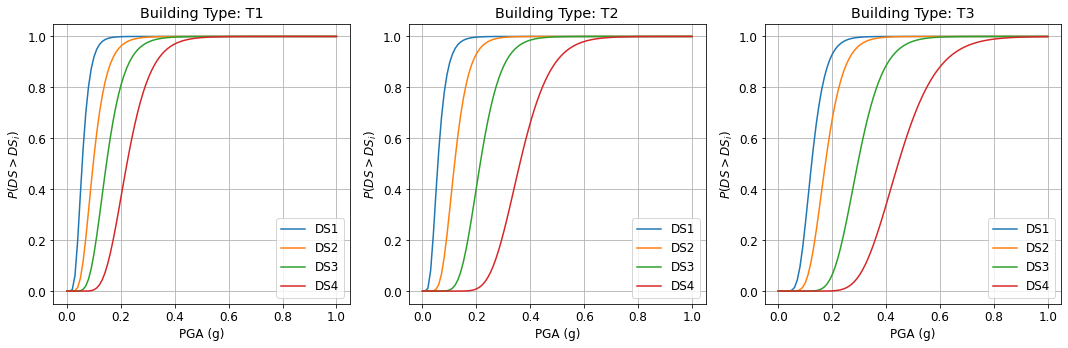

In [37]:


# Typologies used
building_types = {
    "T1": {
         "medians": [0.057, 0.098, 0.147, 0.223],
        "dispersions": [0.406, 0.404, 0.358, 0.310]
    },
    "T2": {
       
        "medians": [0.057, 0.119, 0.214, 0.361],
        "dispersions": [0.451, 0.349, 0.286, 0.247]
    },
    "T3": {
        "medians": [0.124, 0.175, 0.295, 0.445],
        "dispersions": [0.326, 0.300, 0.254, 0.254]
       
    }
}



# Create subplots for each building type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))



# Ground motion intensity levels
pga_levels = np.linspace(0, 1, 100)
plt.rc('font',size=12)
# Labels for the damage states
damage_state_labels = ["DS1", "DS2", "DS3", "DS4"]

for i, (building_type, data) in enumerate(building_types.items()):
    ax = axes[i]
    medians = data["medians"]
    dispersions = data["dispersions"]
    
    ax.set_title(f'Building Type: {building_type}')
    
    for median, dispersion, ds_label in zip(medians, dispersions, damage_state_labels):
        exceedance_probability = lognorm.cdf(pga_levels, s=dispersion, scale=(median))
        ax.plot(pga_levels, exceedance_probability, label=f'{ds_label}')
    
    ax.set_xlabel('PGA (g)')
    ax.set_ylabel('$P(DS>DS_i)$')
    ax.grid(True)
    ax.legend()
    

plt.tight_layout()
plt.show()

#### Only plotting T1 and T2 with damage states DS1 and DS2

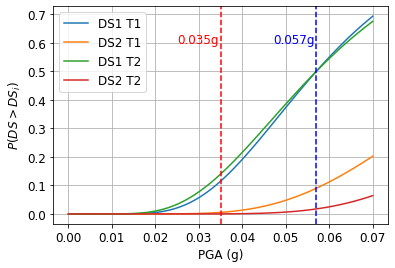

In [114]:
# Ground motion intensity levels
pga_levels = np.linspace(0, 0.07, 100)

plt.rc('font',size=12)
fig, ax = plt.subplots()
# Typology and damage states used for plotting
damage_state_labels = ["DS1","DS2"]
typology=['T1','T2']

# Plotting
for btype in typology:
    medians=building_types[btype]['medians']
    dispersions=building_types[btype]['dispersions']
    for median, dispersion, ds_label in zip(medians, dispersions, damage_state_labels):
        exceedance_probability = lognorm.cdf(pga_levels, s=dispersion, scale=(median))
        ax.plot(pga_levels, exceedance_probability, label=f'{ds_label} {btype}')

#-------------
ax.axvline(0.057,linestyle='--',c='blue')
ax.axvline(0.035,linestyle='--',c='red')
ax.text(0.047,0.6,'0.057g',c='blue')

ax.text(0.025,0.6,'0.035g',c='red')
ax.set_xlabel('PGA (g)')
ax.set_ylabel('$P(DS>DS_i)$')
ax.grid(True)
ax.legend()
plt.show()

# Calculation for a single PGA value for a single building
As obvious from the above plot for PGA values less than 0.06, probability of a building buind in damage state 1 will be higher in the case of 'T2' as compared to the 'T1' 

In [52]:
pga=0.0225 ##(in g) This PGA value correspond to the building with index 673 for EQ1 in the inventory

typology=np.array(['T1','T2']) # Typologies used for calculation
ds=dict({})
wds=dict({})

for btype in typology:
    medians=building_types[btype]['medians']
    dispersions=building_types[btype]['dispersions']
    exceedences=np.array([norm.cdf((np.log(pga/(median)))/dispersion) for median, dispersion in zip(medians, dispersions)])
    ds4=exceedences[3]
    ds3=exceedences[2]-ds4
    ds2=exceedences[1]-(ds3+ds4)
    ds1=exceedences[0]-(ds2+ds3+ds4)
    ds[btype]=[ds1,ds2,ds3,ds4] ## Damage states
    wds[btype]=[1*ds1+2*ds2+3*ds3+4*ds4]

In [53]:
wds

{'T1': [0.011160467049349527], 'T2': [0.019649790071070188]}

In [99]:
print(f'Sum of weighted P(DS=DSi) for T1 are {np.sum(wds["T1"])} and for T2, it is {np.sum(wds["T2"])}')
print('Which means for lower PGA values (<0.057g) T1 is stronger than T2')

Sum of weighted P(DS=DSi) for T1 are 0.011160467049349527 and for T2, it is 0.019649790071070188
Which means for lower PGA values (<0.057g) T1 is stronger than T2


## Loading buildings data and PGA value at the building locations in site class 1 for test EQs

In [44]:
## load buildings
df_build_fac = geopandas.read_file('C:/Users/s2122917/Documents/Risk_work/2.TV0_results_himanshu/bldPort_TV0_siteclasses.shp')
## Load PGA values
pgaxy=np.loadtxt('C:/Users/s2122917/Documents/Risk_work/2.TV0_results_himanshu/pgaxy_build_fac_teseq')

#loading polygons
tv0_dir='C:/Users/s2122917/Documents/Risk_work/TV0_layout/'
polygons=tv0_dir+'polygonsTV0.shp'
df_polygons=geopandas.read_file(polygons)
df_poly_lowinc=df_polygons[df_polygons['type']=='lowIncome']
df_poly_midinc=df_polygons[df_polygons['type']=='midIncome']
df_poly_highinc=df_polygons[df_polygons['type']=='highIncome']


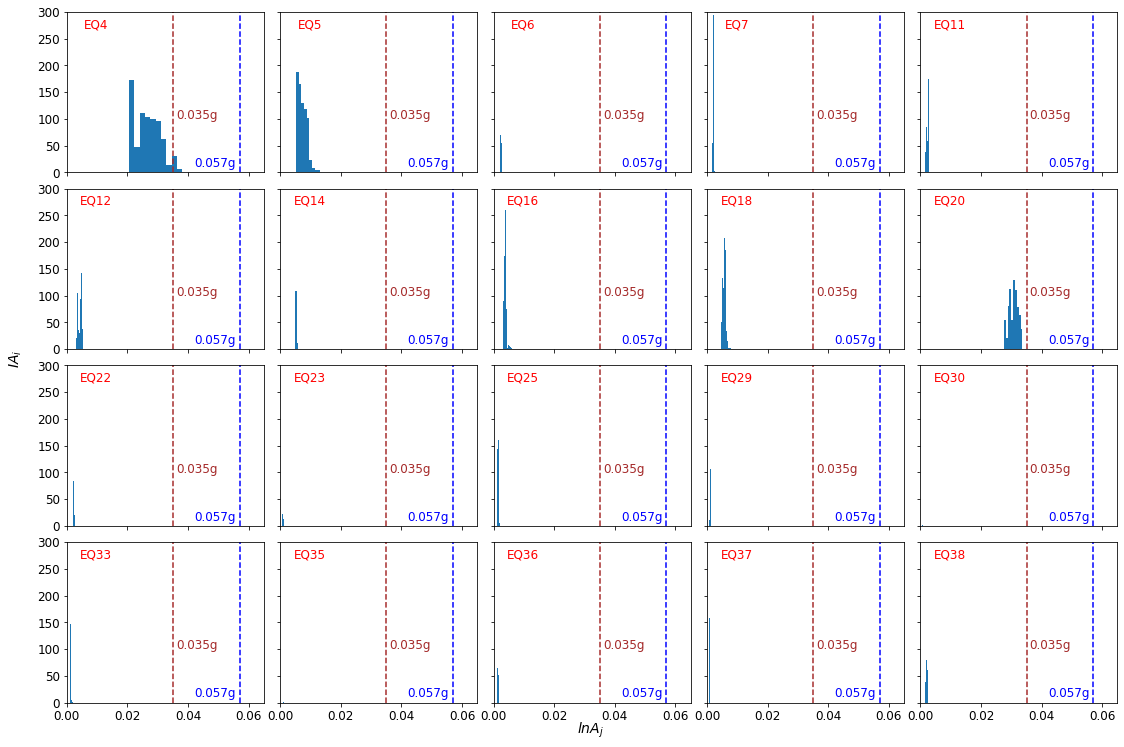

In [118]:
eq=[3,4,5,6,10,11,13,15,17,19,21,22,24,28,29,32,34,35,36,37]## Earthquake indices used for calculation

# Create a grid of subplots (6 rows, 5 columns)
fig, axs = plt.subplots(4, 5, figsize=(15, 10),sharex=True,sharey=True)

# Loop through your 11 plots
for i in range(len(eq)):
    row, col = divmod(i, 5)  # Calculate the row and column index in the grid

    ax = axs[row, col]  # Get the current subplot

    # Scatter plots go here, modify as needed
    ax.hist(pgaxy[i][df_build_fac['cluster']==0]/g)


    ax.tick_params(axis='both', which='both' ,labelbottom=False, labelleft=False)
    # Add the "test" label in the top-right corner
    ax.text(0.15, 0.90,'EQ'+str(eq[i]+1) , transform=ax.transAxes, fontsize=12, color='red', ha='center')
    ax.set_xlim(0,0.065)
    ax.set_ylim(0,300)
    ax.axvline(0.057,linestyle='--',c='blue')

    ax.text(0.042,10,'0.057g',c='blue')
    ax.axvline(0.035,linestyle='--',c='brown')
    ax.text(0.036,100,'0.035g',c='brown')
        

# Adjust spacing between subplots
plt.tight_layout()

for ax in axs[3, :]:
    ax.tick_params(axis='x', labelbottom=True)

# Add y-axis tick labels to the left column
for ax in axs[:, 0]:
    ax.tick_params(axis='y', labelleft=True)
fig.text(0.5, -0.02, r'$lnA_j$', ha='center', fontsize=14)

# Add one y-label for the entire figure
fig.text(-0.04, 0.5, r'$IA_i$', va='center', rotation='vertical', fontsize=14)

#axs[1, 5].set_visible(False)

# Show or save the figure
plt.show()


#### The above plot suggests the PGA values for site class 1 buildings are less than 0.057g, which makes T2 buildings showing higher damage than T1